<a href="https://colab.research.google.com/github/andssuu/moncattle/blob/master/unsupervised/notebooks/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!git clone https://github.com/andssuu/moncattle.git

Cloning into 'moncattle'...
remote: Enumerating objects: 257, done.
remote: Counting objects: 100% (257/257), done.
remote: Compressing objects: 100% (181/181), done.
remote: Total 257 (delta 116), reused 131 (delta 54), pack-reused 0
Receiving objects: 100% (257/257), 2.33 MiB | 2.38 MiB/s, done.
Resolving deltas: 100% (116/116), done.


In [5]:
import math
from datetime import datetime

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing


df = pd.read_csv("moncattle/data/lomba.csv", float_precision='high')
df.head()

,id_colar,acc_x,acc_y,acc_z,mag_x,mag_y,mag_z,giro_x,giro_y,giro_z,horario,data,velocidade_deslocamento,comportamento
0,A2,-11889,11184,-17877,-1280,-73,-309,-4013,1260,-31,131911.203,250515,0.0,Pastando
1,A2,-9144,8945,-11799,-1213,707,-238,-394,2278,-602,131949.203,250515,0.0,Pastando
2,A2,6391,9265,-11767,570,-405,-1533,-1072,-1094,1854,132148.203,250515,0.0,EmPe
3,A2,-1394,10206,-13229,671,-73,-1590,287,2253,-2760,132151.203,250515,0.0,Pastando
4,A2,-4864,5953,-10472,-84,-200,-1767,-7101,9206,-3595,132154.203,250515,0.0,Pastando


In [6]:
data = df[df.columns[1:10]]
data_normalized = (data - data.min()) / (data.max() - data.min())
labels = df[df.columns[-1]]
le = preprocessing.LabelEncoder()
le.fit(labels.values)
labels = le.transform(labels.values)
data_normalized.head()

,acc_x,acc_y,acc_z,mag_x,mag_y,mag_z,giro_x,giro_y,giro_z
0,0.334605,0.661770,0.244090,0.173799,0.335664,0.439289,0.418168,0.451028,0.499557
1,0.378613,0.626671,0.345635,0.191389,0.523752,0.460681,0.475423,0.468785,0.490844
2,0.627671,0.631688,0.346170,0.659491,0.255606,0.070503,0.464696,0.409967,0.528322
3,0.502862,0.646439,0.321744,0.686007,0.335664,0.053329,0.486197,0.468349,0.457914
4,0.447230,0.579768,0.367806,0.487792,0.305040,0.000000,0.369314,0.589632,0.445172


In [12]:
data_normalized.iloc[:, 0:3]

,acc_x,acc_y,acc_z
0,0.334605,0.661770,0.244090
1,0.378613,0.626671,0.345635
2,0.627671,0.631688,0.346170
3,0.502862,0.646439,0.321744
4,0.447230,0.579768,0.367806
...,...,...,...
13083,0.496737,0.544121,0.394503
13084,0.580810,0.708705,0.338819
13085,0.425347,0.668887,0.354206
13086,0.488866,0.688796,0.414702


In [43]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_normalized.iloc[:, 0:3])
print(kmeans.labels_)
x_clustered = kmeans.predict(data_normalized.iloc[:, 0:3])
kmeans.cluster_centers_


[2 2 3 ... 2 0 0]


array([[  2157.47237432,   9101.86983574, -11903.31881533],
       [ -2953.72325581,   4567.3375969 , -12745.15930233],
       [ -8199.32478241,   8862.39074668, -12368.70545121],
       [  7655.56605526,   8695.21407012,  -9954.22428605]])

Text(0.5, 0, 'ACC Z')

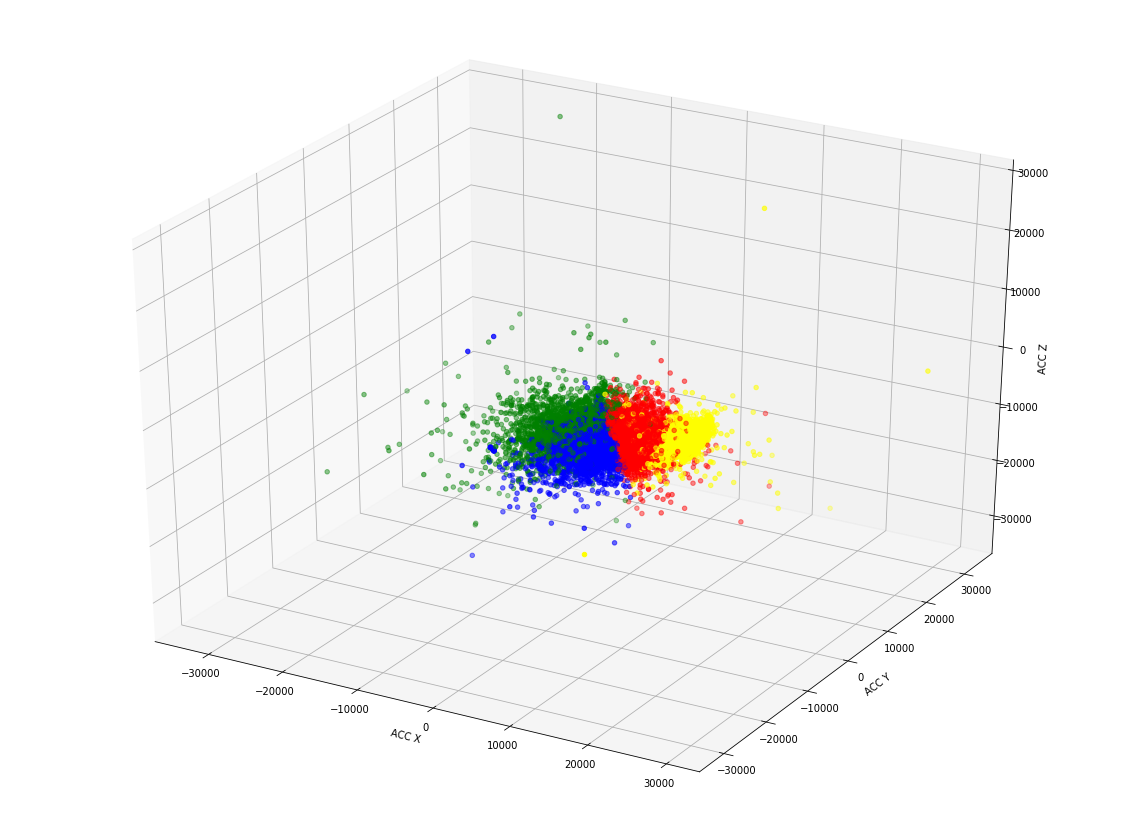

In [44]:
fig = plt.figure(figsize=(20,15))
graph = fig.add_subplot(111, projection='3d')
LABEL_COLOR_MAP = {0 : 'red', 1 : 'blue', 2: 'green', 3: 'yellow'}
label_color = [LABEL_COLOR_MAP[l] for l in x_clustered]
graph.scatter(data_normalized.iloc[:, 0], data_normalized.iloc[:, 1], data_normalized.iloc[:, 2], c=label_color, marker='o', s=20)
graph.set_xlabel('ACC X')
graph.set_ylabel('ACC Y')
graph.set_zlabel('ACC Z')

Text(0.5, 0, 'MAG Z')

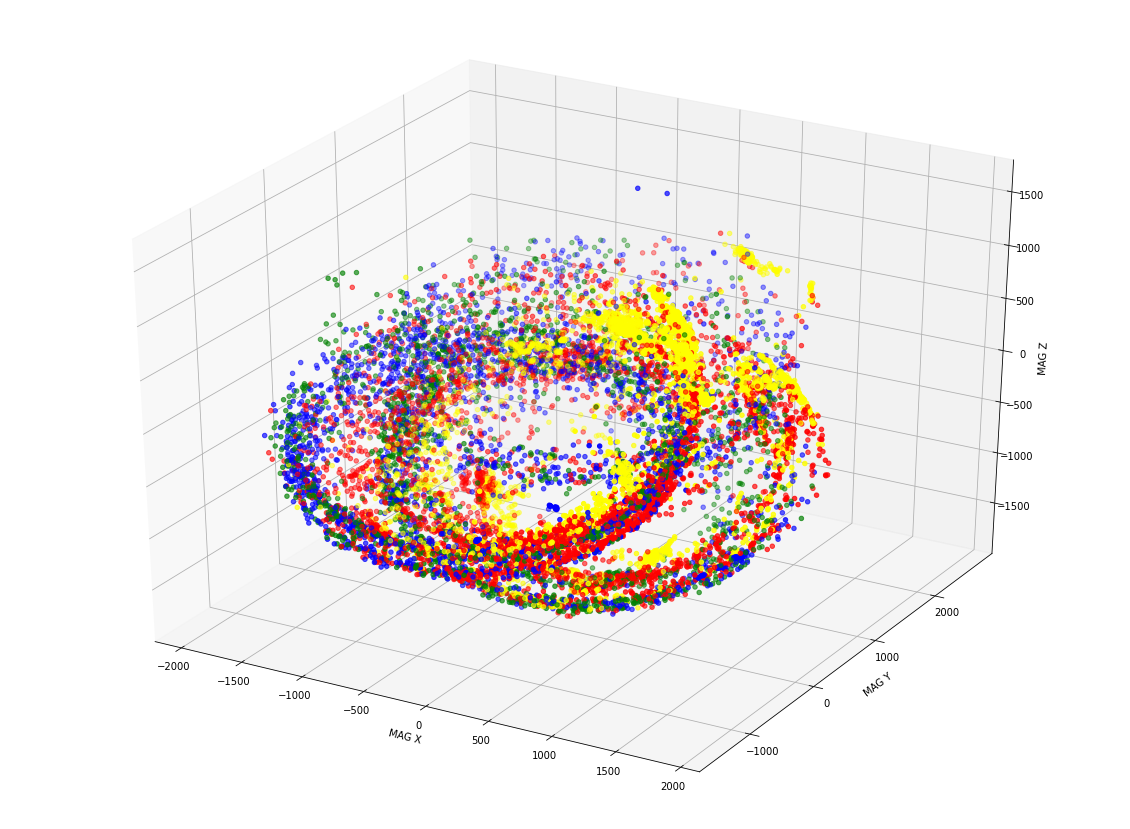

In [45]:
fig = plt.figure(figsize=(20,15))
graph = fig.add_subplot(111, projection='3d')
LABEL_COLOR_MAP = {0 : 'red', 1 : 'blue', 2: 'green', 3: 'yellow'}
label_color = [LABEL_COLOR_MAP[l] for l in x_clustered]
graph.scatter(data_normalized.iloc[:, 3], data_normalized.iloc[:, 4], data_normalized.iloc[:, 5], c=label_color, marker='o', s=20)
graph.set_xlabel('MAG X')
graph.set_ylabel('MAG Y')
graph.set_zlabel('MAG Z')

Text(0.5, 0, 'GIR Z')

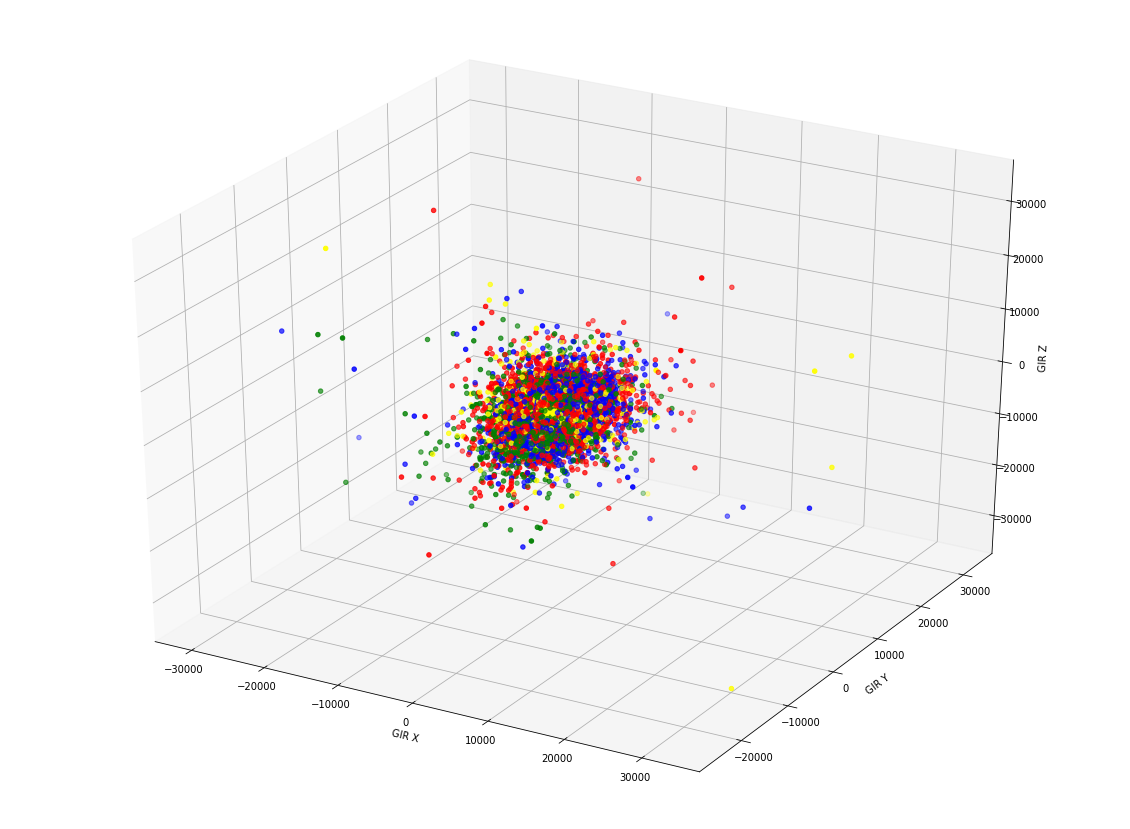

In [46]:
fig = plt.figure(figsize=(20,15))
graph = fig.add_subplot(111, projection='3d')
LABEL_COLOR_MAP = {0 : 'red', 1 : 'blue', 2: 'green', 3: 'yellow'}
label_color = [LABEL_COLOR_MAP[l] for l in x_clustered]
graph.scatter(data_normalized.iloc[:, 6], data_normalized.iloc[:, 7], data_normalized.iloc[:, 8], c=label_color, marker='o', s=20)
graph.set_xlabel('GIR X')
graph.set_ylabel('GIR Y')
graph.set_zlabel('GIR Z')